In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [9]:
oil_df = pd.read_csv("./data/oil.csv",parse_dates = ['date'], infer_datetime_format = True,
                  index_col = 'date')
train_df = pd.read_csv("./data/train.csv")
test_df = pd.read_csv("./data/test.csv")
transactions_df = pd.read_csv("./data/transactions.csv",parse_dates = ['date'], infer_datetime_format = True,
                  index_col = 'date')


In [10]:
transactions_df

,store_nbr,transactions
date,,
2013-01-01,25,770
2013-01-02,1,2111
2013-01-02,2,2358
2013-01-02,3,3487
2013-01-02,4,1922
...,...,...
2017-08-15,50,2804
2017-08-15,51,1573
2017-08-15,52,2255


<AxesSubplot:xlabel='date'>

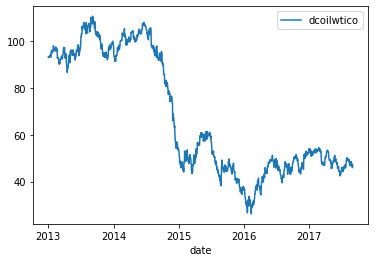

In [23]:
oil_df["dcoilwtico"].fillna(method='bfill', inplace=True)
sb.lineplot(data=oil_df)


In [48]:
transactions_oil_df = pd.DataFrame(columns=["transactions","oil"],dtype=np.float64)
transactions_oil_df

,transactions,oil


In [49]:
for date in transactions_df.index.drop_duplicates():
    t = transactions_df.loc[transactions_df.index == date].transactions.mean()
    transactions_oil_df.at[date,"transactions"] = t
    if date in oil_df.index:
        transactions_oil_df.at[date,"oil"] = oil_df.at[date,"dcoilwtico"]
transactions_oil_df["oil"].fillna(method='bfill', inplace=True)
transactions_oil_df

,transactions,oil
2013-01-01,770.000000,93.14
2013-01-02,2026.413043,93.14
2013-01-03,1706.608696,92.97
2013-01-04,1706.391304,93.12
2013-01-05,2034.195652,93.20
...,...,...
2017-08-11,1658.351852,48.81
2017-08-12,1665.314815,47.59
2017-08-13,1592.462963,47.59
2017-08-14,1582.370370,47.59


<AxesSubplot:ylabel='oil'>

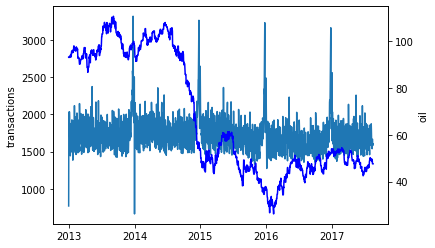

In [50]:
sb.lineplot(data=transactions_oil_df["transactions"])
ax2 = plt.twinx()
sb.lineplot(data=transactions_oil_df["oil"], color="b", ax=ax2)

In [52]:
print(transactions_oil_df.dtypes)
correlation = transactions_oil_df.corr()
correlation

transactions    float64
oil             float64
dtype: object


,transactions,oil
transactions,1.000000,0.103546
oil,0.103546,1.000000


transactions    float64
oil             float64
dtype: object


,transactions,oil
transactions,1.000000,0.089494
oil,0.089494,1.000000


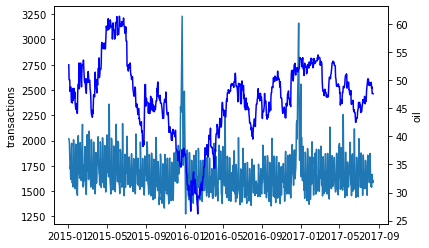

In [53]:
transactions_oil_df = transactions_oil_df.loc[transactions_oil_df.index > pd.to_datetime("2015-01-01")]
sb.lineplot(data=transactions_oil_df["transactions"])
ax2 = plt.twinx()
sb.lineplot(data=transactions_oil_df["oil"], color="b", ax=ax2)
print(transactions_oil_df.dtypes)
correlation = transactions_oil_df.corr()
correlation

In [5]:
train_df["family"].drop_duplicates()

0                     AUTOMOTIVE
1                      BABY CARE
2                         BEAUTY
3                      BEVERAGES
4                          BOOKS
5                   BREAD/BAKERY
6                    CELEBRATION
7                       CLEANING
8                          DAIRY
9                           DELI
10                          EGGS
11                  FROZEN FOODS
12                     GROCERY I
13                    GROCERY II
14                      HARDWARE
15            HOME AND KITCHEN I
16           HOME AND KITCHEN II
17               HOME APPLIANCES
18                     HOME CARE
19                    LADIESWEAR
20               LAWN AND GARDEN
21                      LINGERIE
22              LIQUOR,WINE,BEER
23                     MAGAZINES
24                         MEATS
25                 PERSONAL CARE
26                  PET SUPPLIES
27       PLAYERS AND ELECTRONICS
28                       POULTRY
29                PREPARED FOODS
30        

In [6]:
train_df

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [18]:
from sklearn.preprocessing import LabelEncoder

train_df["date"] = train_df["date"].astype("datetime64")
train_df = train_df.loc[train_df["date"] > pd.to_datetime("2015-01-01")]

X = train_df[["date", "store_nbr", "family", "onpromotion"]]
Y = train_df["sales"]
X

,date,store_nbr,family,onpromotion
1299078,2015-01-02,1,AUTOMOTIVE,0
1299079,2015-01-02,1,BABY CARE,0
1299080,2015-01-02,1,BEAUTY,0
1299081,2015-01-02,1,BEVERAGES,1
1299082,2015-01-02,1,BOOKS,0
...,...,...,...,...
3000883,2017-08-15,9,POULTRY,0
3000884,2017-08-15,9,PREPARED FOODS,1
3000885,2017-08-15,9,PRODUCE,148
3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,8


In [19]:

X["date"] = X["date"].dt.strftime("%Y%m%d").astype(int)

le = LabelEncoder()                            # 創造 Label Encoder
le.fit(X['family'])                         # 給予每個類別一個數值
X['family'] = le.transform(X['family'])  # 轉換所有類別成為數值
X

C:\Users\James\AppData\Local\Temp\ipykernel_35512\2207048821.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["date"] = X["date"].dt.strftime("%Y%m%d").astype(int)
C:\Users\James\AppData\Local\Temp\ipykernel_35512\2207048821.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['family'] = le.transform(X['family'])  # 轉換所有類別成為數值


,date,store_nbr,family,onpromotion
1299078,20150102,1,0,0
1299079,20150102,1,1,0
1299080,20150102,1,2,0
1299081,20150102,1,3,1
1299082,20150102,1,4,0
...,...,...,...,...
3000883,20170815,9,28,0
3000884,20170815,9,29,1
3000885,20170815,9,30,148
3000886,20170815,9,31,8


In [20]:
Y

1299078       2.000
1299079       0.000
1299080       3.000
1299081     794.000
1299082       0.000
             ...   
3000883     438.133
3000884     154.553
3000885    2419.729
3000886     121.000
3000887      16.000
Name: sales, Length: 1701810, dtype: float64

In [21]:
pred_X = test_df[["date", "store_nbr", "family", "onpromotion"]]
pred_X["date"] = pred_X["date"].str.replace("-","").astype(int)
le = LabelEncoder()                            # 創造 Label Encoder
le.fit(pred_X['family'])                         # 給予每個類別一個數值
pred_X['family'] = le.transform(pred_X['family'])  # 轉換所有類別成為數值

C:\Users\James\AppData\Local\Temp\ipykernel_35512\3714848995.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_X["date"] = pred_X["date"].str.replace("-","").astype(int)
C:\Users\James\AppData\Local\Temp\ipykernel_35512\3714848995.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_X['family'] = le.transform(pred_X['family'])  # 轉換所有類別成為數值


In [22]:
from sklearn.svm import SVR

M = SVR()
M.fit(X,Y)


In [ ]:
pred_Y =  M.predict(X)
